# Quantum Fourier transform notes
## Intorduction
1. General properties:
   1) perform Fourier transform on the multi-qubit wave function Amplitudes.
   2) If we have n qubits then we have 2^n amplitudes in the wave function. So, we can consider QFT as a FT on the set of data with 2^n elements.
   3) It seems that the possible functions that can be transformed are limited by the physical limitations on the amplitudes. At least we know that sum(|A_i^2|)=1.
   4) The QFT operator matches exactly the FT matrix.

2. Definition and explanation
    1) |y>=1/sqrt(N)*sum_(j=1)^n sum_(k=1)^n exp(2*pi*1j*X_0^i*X_0^k)/2^n *|x_0^i> *<x_0^j|x> this is QFT of |x>
      Here, |x_0^i> is the basis multi-qubit state i. It is a non superpositioned state such as |00000...0> or |111...1>.
      X_0^i is the integer number obtained by converting binary number denoting the state |....> into decimal number. 
    2) there is another useful representation of QFT transformation making a hint on how to realize the QFT with simple 2-qubit operation.
      |y>=1/sqrt(N)*sum_(j=1)^n TensorProduct_(k=1)^n (|0> + exp(2*pi*1j*X_0^i)/2^k *|1>) *<x_0^j|x>.
      From this representation it can be understood that we need a Hadamard operator and controlled Z rotations to perform the QFT.
      For example condier qubit k=1. Then we get (|0> + exp(pi*1j*X_0^i) *|1>). Qbit 1 is the last qubit in the function |Psi_n... Psi_1>.  Consider a 2-qubit system. Lets make mapping between basis states and X numbers |00> - 0, |01> - 1, |10> - 2, |11> -3. The state of the second qubit does not affect the first one, since if q2 is 1, then we do rotation of 2pi on the q1. If initial state of qubit 1 is zero then we will get |+> state is initial state is |1> then we get |-> state. This is the Hadamard operator. For the second qubit k=2, we have (|0> + exp(pi*1j*X_0^i/2) *|1>). So, rotations are twice samller. Q1 makes controlled pi/2 z roation on q2, q2 performs Hadamard on itself.
    3) While the complex amplitudes of the QFT correspond to the DFT of the initial complex amplitudes, one cannot easily extract the data. Measurements will inevitable remove the phase information of the DFT. So, if one does measurements, one gets |DFT|^2 not the DFT itself.

3. Useful link. https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb
    it describes the QFT in details and pretty well

4. Classical FFT is done in O(N*log(N)) operations. QFT is done in O(log(N)*log(N)) operations which is much faster

## 1. Studying precision of the QFT
I studied how precise the QFT is perfromed based on measurements. So, the |FT|^2 is measured and phase information is lost. The measurement results is compared with results of classical FT.

### 1.1. Some conclusions
Based on the simulation data the precision of the QFT (after measurement |DFT|^2) is quite low at 1000 repetiotion for 4 qubit.
Error decreases with increasing number of shots: QFT4: 1000 - 10%, 4000 - 5%, 16k - 2.8%, 64k - 1.3%. So, it scales as 1/sqrt(Shots number)
Error decreases if we decrease number of qubits: 1000 shots: QFT3 - 7%, QFT4 - 10%, QFT5 - 17%, QFT6 - 25%

## 2. What else in the notebook
1) The QFT function is developed and tested
2) Inverse QFT function is developed and tested
3) The QFT and IQFT controled gates are developed and tested

In [1]:
import qiskit
from qiskit.circuit.library import RZGate
import math


### 2-qubit QFT

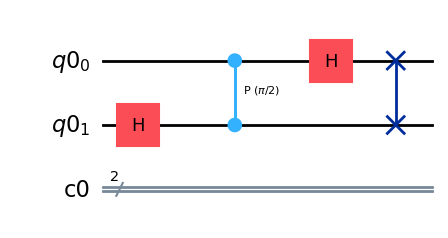

In [2]:
#QFT2 - quantum fourier transform for two qubits
qubits = qiskit.QuantumRegister(2)
output = qiskit.ClassicalRegister(2)

PI=math.pi

QFT_2 = qiskit.QuantumCircuit(qubits, output)

QFT_2.h(qubits[1])
QFT_2.cp(PI / 2, qubits[1], qubits[0])
QFT_2.h(qubits[0])
QFT_2.swap(qubits[0], qubits[1])
QFT_2.draw('mpl')


## Matrix operator representing 2-qubit QFT

In [3]:
#Converting the circuit into a matrix operator
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex
qft2Matrix = qi.Operator(QFT_2)
array_to_latex(qft2Matrix)

<IPython.core.display.Latex object>

## QFT circuit for a number (QubitsNumber) qubits
here one can enter an input function with 2^n (Psi_init array) size and get the FT of this function in the next cell

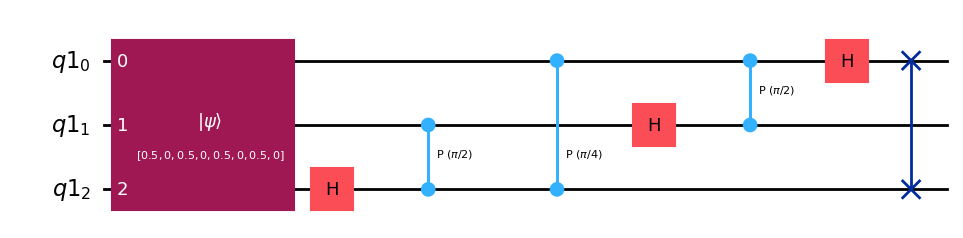

In [4]:
#QFT circuit for a number (QubitsNumber) qubits
# Psi_init is the input state of the circuit 
import numpy as np

QubitsNumber = 3
qubits1 = qiskit.QuantumRegister(QubitsNumber)
QFT = qiskit.QuantumCircuit(qubits1)

Psi_init = [1, 0, 1, 0, 1, 0, 1, 0]

norm = np.linalg.norm(Psi_init)
Psi_init = Psi_init / norm
QFT.initialize(Psi_init)

for i in range(0, QubitsNumber):
    QFT.h(qubits1[QubitsNumber - 1 - i])
    if i < QubitsNumber - 1:
        for j in range(0, QubitsNumber - i - 1):
            Rangle = PI / (math.pow(2, j + 1))
            QFT.cp(Rangle, qubits1[QubitsNumber - 1 - i], qubits1[QubitsNumber - 2 - j - i])

for i in range(0, QubitsNumber // 2):
    QFT.swap(qubits1[i], qubits1[QubitsNumber - 1 - i])
QFT.draw('mpl')       
        

## Results of the QFT

In [5]:
#Getting the output state psi of the of QFT in previous cell 
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

state_simulator = Aer.get_backend('statevector_simulator')
circ = transpile(QFT, state_simulator)
result = state_simulator.run(circ).result()
psi = result.get_statevector(QFT)
print(f'psi = {psi.round(2)!r}')
Psi_list=list(psi)

res = [abs(ele) for ele in Psi_list]
res

psi = array([ 0.71-0.j, -0.  +0.j,  0.  +0.j,  0.  +0.j,  0.71-0.j, -0.  +0.j,
        0.  +0.j,  0.  +0.j])


C:\Users\Oleg\AppData\Local\Temp\ipykernel_15188\1642508910.py:9: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(f'psi = {psi.round(2)!r}')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_15188\1642508910.py:10: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  Psi_list=list(psi)


[0.7071067811865477,
 3.061616997868384e-17,
 5.277136900731789e-17,
 3.0616169978683836e-17,
 0.7071067811865477,
 3.061616997868384e-17,
 5.277136900731789e-17,
 3.0616169978683836e-17]

## Separate function for QFT + measurements

In [6]:
#the function implements QFT transformation QC with n qubits
#the input Psi-function is also transferred to the function
#If measure paramater is no, then there is no classical bits in the circuit and no measurements are added
#if measure parameter is yes, measurements are added to the circuit

def QFTn_meas(n, Psi_init,Measure):
    QubitsNumber=n
    qubits1 = qiskit.QuantumRegister(QubitsNumber)
    if Measure=='yes':
        Readout=qiskit.ClassicalRegister(QubitsNumber)
        QFT = qiskit.QuantumCircuit(qubits1,Readout)
    else:
        QFT = qiskit.QuantumCircuit(qubits1)
    
    norm=np.linalg.norm(Psi_init)
    Psi_init=Psi_init/norm
    QFT.initialize(Psi_init)

    for i in range(0,QubitsNumber):
        QFT.h(qubits1[QubitsNumber-1-i])
        if i < QubitsNumber-1:
            for j in range(0,QubitsNumber - i - 1):
                Rangle = PI/(math.pow(2,j + 1))
                QFT.cp(Rangle,qubits1[QubitsNumber-1-i],qubits1[QubitsNumber-2-j-i])
    for i in range(0,QubitsNumber // 2):
        QFT.swap(qubits1[i],qubits1[QubitsNumber-1-i])
    
    if Measure == 'yes':
        QFT.measure(qubits1, Readout)
        return [QFT,qubits1,Readout]
    else:
        return [QFT,qubits1]


## Separate function for QFT only

In [7]:
#the function implements QFT transformation QC with n qubits
def QFTn(qreg, circ):
    """the function implements QFT transformation QC with n qubits
    The algorithm follows the one provided at https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb 
    The function adds QFT circuit to the existing circuit circ using a list of qubits qreg
        
    Parameter:
    __________
    qreg: qiskit.QuantumRegister, list of qubits that will be used for QFT
    circ: qiskit.QuantumCircuit, a quantum circuit to which the QFT is added
    
    
    Returns:
    __________
    qiskit.QuantumCircuit, a new quantum circuit with added QFT


    Notes:
    __________
    Qiskit 1.0 was used to create the function

    References:
    ___________
    My primitive study of the QFT can be found at https://github.com/OlegUdalov/QC-qiskit-codes
    """
    QubitsNumber=len(qreg)

    for i in range(0,QubitsNumber):
        circ.h(qreg[QubitsNumber-1-i])
        if i<QubitsNumber-1:
            for j in range(0,QubitsNumber-i-1):
                Rangle = PI/(math.pow(2,j+1))
                circ.cp(Rangle,qubits1[QubitsNumber-1-i],qubits1[QubitsNumber-2-j-i])
    for i in range(0,QubitsNumber//2):
        circ.swap(qubits1[i],qubits1[QubitsNumber-1-i])
    
    return circ
    

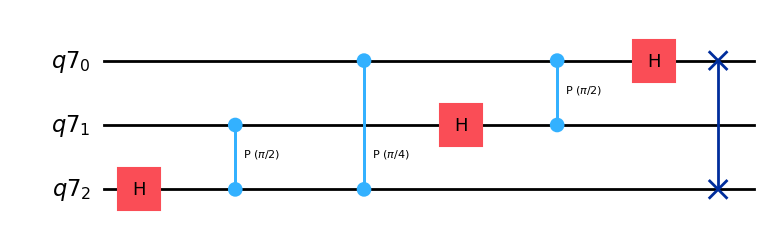

In [8]:
QubitsNumber = 3
qubits1 = qiskit.QuantumRegister(QubitsNumber)
QFT = qiskit.QuantumCircuit(qubits1)
QFT = QFTn(qubits1, QFT)
QFT.draw('mpl') 

<class 'list'>
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


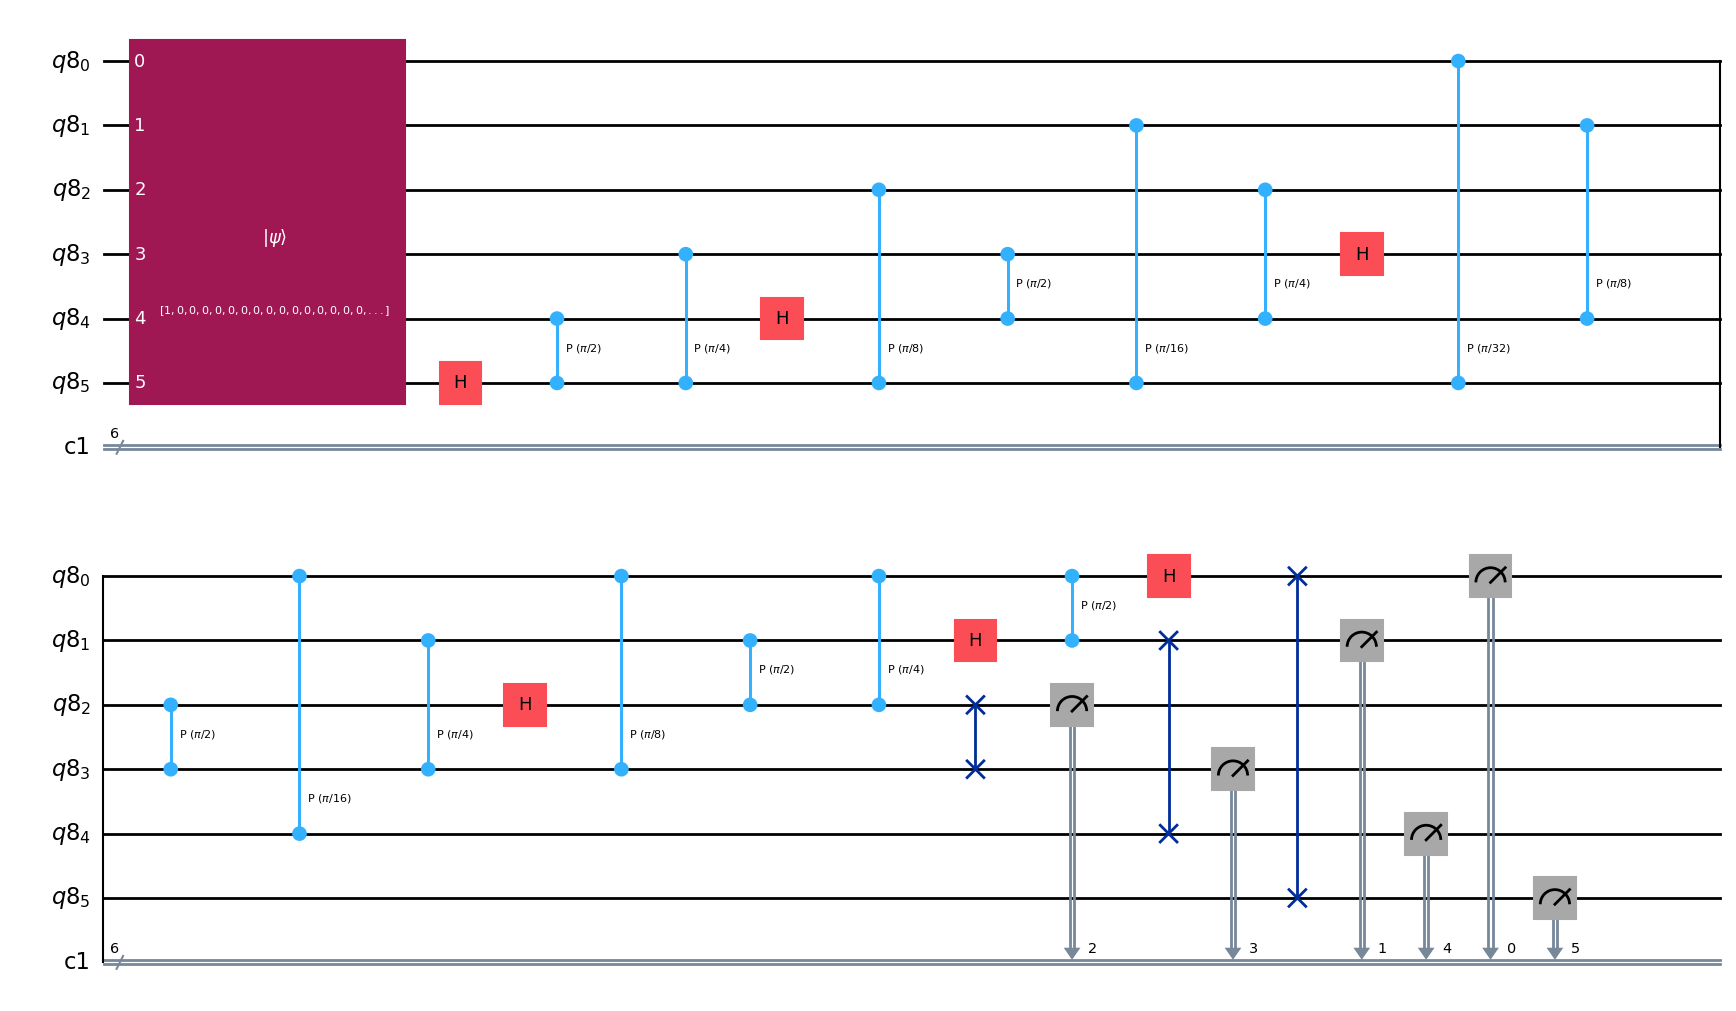

In [9]:
Psi_init = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QubitsNumber=6
Measure='yes'
Res=QFTn_meas(QubitsNumber, Psi_init,Measure)
print(type(Res))
QFT=Res[0]
print(type(QFT))
Qubits=Res[1]
if Measure=='yes':
    Readout=Res[2]

QFT.draw('mpl') 

## Studying the precision of the QFT after measurements

We estimate how precise the QFT calculates the |FT|^2 depending on the number of qubits and number of tries

In [10]:
#studying the precision of the QFT after measurements

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
import numpy

simulator = Aer.get_backend('qasm_simulator') 
#result = execute(circuit, simulator, shots=1000).result()
simulator = AerSimulator()
ShotNum=4000
circ = transpile(QFT, simulator)
result = simulator.run(circ,shots=ShotNum).result()
counts = result.get_counts(QFT)


import pandas as pd
n=0
dd=dict(counts)
H=[]
for key in dict(dd):
    H.append(dd[key])
    n=n+1
Error=numpy.std(H)
mean=ShotNum/(math.pow(2,QubitsNumber))

#plot_histogram(counts, title='results')
print('Std: '+str(Error/mean*100)+'%')



Std: 10.62449998823474%


## Some conclusions
- Based on the simulation data the precision of the QFT (after measurement |DFT|^2) is quite low at 1000 repetiotion for 4 qubit. 
- Error decreases with increasing number of shots: QFT4: 1000 - 10%, 4000 - 5%, 16k - 2.8%, 64k - 1.3%. So, it scales as 1/sqrt(Shots number)
- Error decreases if we decrease number of qubits: 1000 shots: QFT3 - 7%, QFT4 - 10%, QFT5 - 17%, QFT6 - 25%

## Inverse QFT

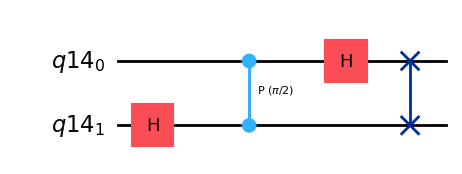

In [11]:
QubitsNumber = 2
qubits1 = qiskit.QuantumRegister(QubitsNumber)
QFT = qiskit.QuantumCircuit(qubits1)
QFT = QFTn(qubits1, QFT)
QFT.draw('mpl') 



In [12]:
#Converting the circuit into a matrix operator
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex
qft2Matrix = qi.Operator(QFT)
array_to_latex(qft2Matrix)

<IPython.core.display.Latex object>

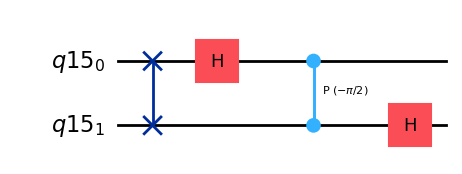

In [13]:
#IQFT = QFT.inverse()

QubitsNumber = 2
qubits1 = qiskit.QuantumRegister(QubitsNumber)
IQFT = qiskit.QuantumCircuit(qubits1)
for i in range(0, QubitsNumber // 2):
    IQFT.swap(qubits1[i], qubits1[QubitsNumber - 1 - i])
    
for i in range(0, QubitsNumber):
    if i > 0:
        for j in range(0, i):
            Rangle = -PI / (math.pow(2, i - j))
            IQFT.cp(Rangle, qubits1[i], qubits1[j])
    IQFT.h(qubits1[i])
    


IQFT.draw('mpl') 

In [14]:
#Converting the circuit into a matrix operator
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex
qft2Matrix = qi.Operator(IQFT)
array_to_latex(qft2Matrix)

<IPython.core.display.Latex object>

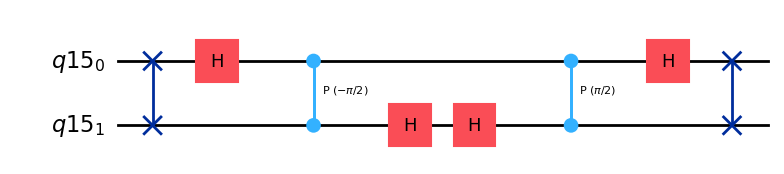

In [15]:
II = QFTn(qubits1,IQFT)
II.draw('mpl') 

In [16]:
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex
qft2Matrix = qi.Operator(II)
array_to_latex(qft2Matrix)

<IPython.core.display.Latex object>

# Controlled QFT gate
Here the circuit is tested perfromnig a QFT controlled by an nuber of qubits


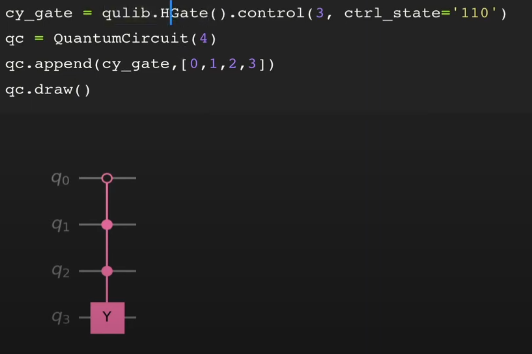

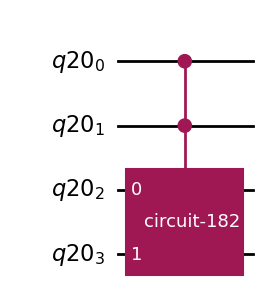

In [17]:
bit_size = 2

qreg = qiskit.QuantumRegister(bit_size)
circ = qiskit.QuantumCircuit(qreg)

for i in range(0, bit_size):
    circ.h(qreg[bit_size - 1 - i])
    if i<bit_size - 1:
        for j in range(0, bit_size - i - 1):
            r_angle = PI / (math.pow(2, j + 1))
            circ.cp(r_angle, qreg[bit_size - 1 - i], qreg[bit_size - 2 - j - i])
for i in range(0, bit_size // 2):
    circ.swap(qreg[i], qreg[bit_size - 1 - i])

contr_qubits_number = 2
qft_gate = circ.to_gate().control(2)
qreg1 = qiskit.QuantumRegister(bit_size + contr_qubits_number)
circ1 = qiskit.QuantumCircuit(qreg1)
circ1.append(qft_gate, qreg1)
circ1.draw('mpl')

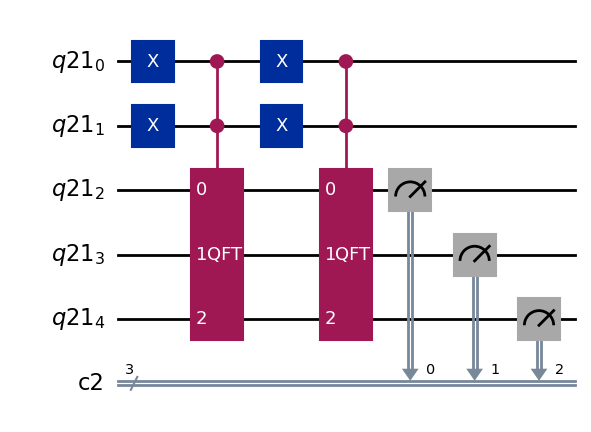

In [18]:
import qiskit
import sys
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')

#sys.path.insert(0, '/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
import quantum_routines as qr

bit_size = 3
contr_bit_size = 2
qreg = qiskit.QuantumRegister(bit_size + contr_bit_size)
cl_reg = qiskit.ClassicalRegister(bit_size)
circ = qiskit.QuantumCircuit(qreg, cl_reg)

q_num = [1, 1]
circ = qr.qubit_binary_prepare([qreg[0], qreg[1]], q_num, circ)

fta_gate = qr.QFTn_contr_gate(bit_size, contr_bit_size)
circ.append(fta_gate, qreg)

circ = qr.qubit_binary_prepare([qreg[0], qreg[1]], q_num, circ)

ifta_gate = qr.IQFTn_contr_gate(bit_size, contr_bit_size)
circ.append(fta_gate, qreg)

#circ = qr.IQFTn([qreg[2],qreg[3],qreg[4]], circ)

circ = qr.qubits_meas([qreg[2],qreg[3],qreg[4]], cl_reg, circ)

circ.draw('mpl')

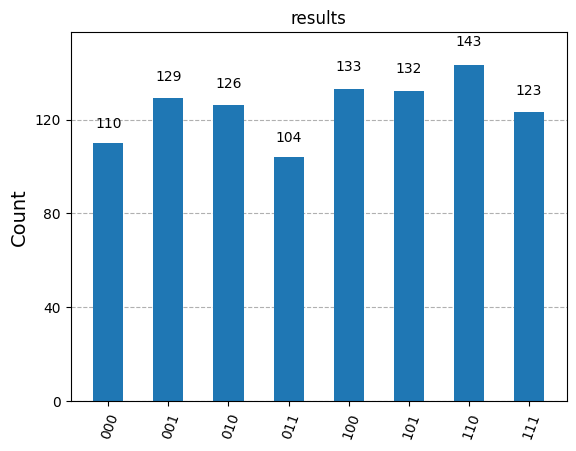

In [19]:
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
import numpy

simulator = Aer.get_backend('qasm_simulator') 
simulator = AerSimulator()
ShotNum=1000
circ = transpile(circ, simulator)
result = simulator.run(circ,shots=ShotNum).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='results')

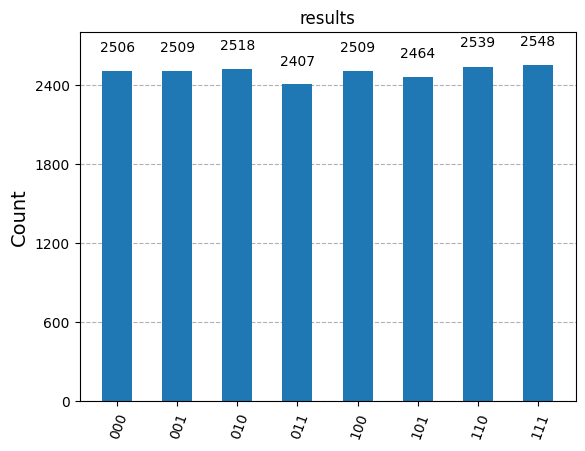

In [20]:
qr.plot_hyst_func(circ,20000)

## Running QFT on a real IBM QC
